<a href="https://colab.research.google.com/github/manideep03/AI-FOR-MEDICAL/blob/master/V1/tata_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [ ]:
df = pd.read_csv('/content/data_tata.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [ ]:
df.shape

(1235, 8)

In [ ]:
df.columns.tolist()

['Date',
 'Open',
 'High',
 'Low',
 'Last',
 'Close',
 'Total Trade Quantity',
 'Turnover (Lacs)']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


- Open and Close represent the starting and final price
- High, Low and Last represent the maximum, minimum, and last price of the share for the day.
- Total Trade Quantity is the number of shares bought or sold in the day

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
data = df.sort_index(ascending=True, axis=0)

- Finding relation between time and Close prices 

for considering more than one attributes use **PCA** to converet into single value 

ex : eigen vector and etc 

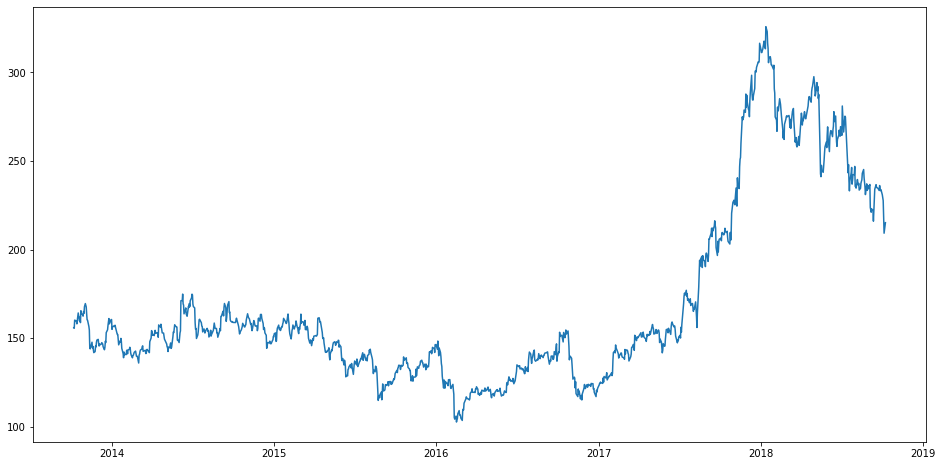

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='close price history')

## Linear regression

In [ ]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
from fastai.tabular import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Close             1235 non-null   object
 1   Year              1235 non-null   int64 
 2   Month             1235 non-null   int64 
 3   Week              1235 non-null   int64 
 4   Day               1235 non-null   int64 
 5   Dayofweek         1235 non-null   int64 
 6   Dayofyear         1235 non-null   int64 
 7   Is_month_end      1235 non-null   bool  
 8   Is_month_start    1235 non-null   bool  
 9   Is_quarter_end    1235 non-null   bool  
 10  Is_quarter_start  1235 non-null   bool  
 11  Is_year_end       1235 non-null   bool  
 12  Is_year_start     1235 non-null   bool  
dtypes: bool(6), int64(6), object(1)
memory usage: 74.9+ KB


In [ ]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False


In [ ]:
new_data.shape

(1235, 13)

In [ ]:
train = new_data[:987]
valid = new_data[987:]

In [ ]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(987, 12)
(987,)
(248, 12)
(248,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = model.predict(x_valid)
rms_lr=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms_lr

121.16382449873667

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


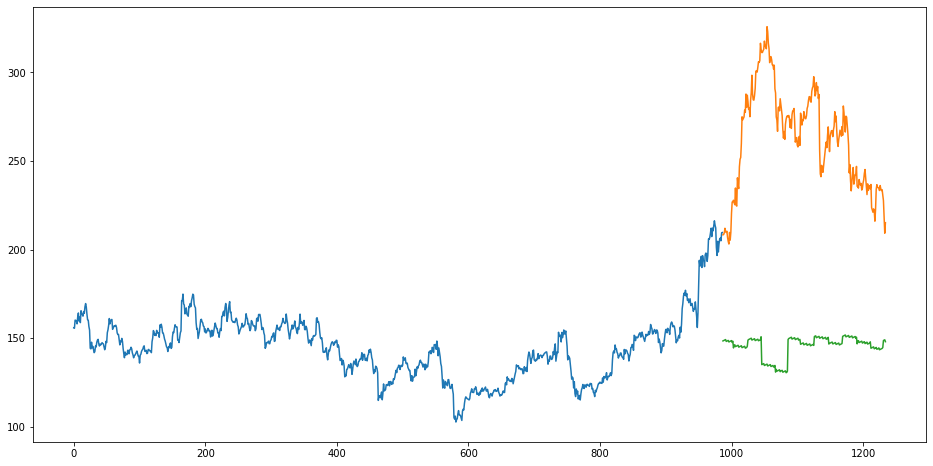

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

- orange is the real values 
- green is the predicted values

In [ ]:
valid['Close']

987      208.3
988     208.45
989      209.4
990        212
991     210.25
         ...  
1230     230.9
1231     227.6
1232     218.2
1233     209.2
1234    215.15
Name: Close, Length: 248, dtype: object

In [ ]:
valid['Predictions']

987     148.415375
988     148.606500
989     148.797625
990     148.988750
991     149.179875
           ...    
1230    144.686143
1231    148.662677
1232    148.853803
1233    149.044928
1234    147.994268
Name: Predictions, Length: 248, dtype: float64

## Auto ARIMA

Parameters in ARIMA:

- p (past values used for forecasting the next value)
- q (past forecast errors used to predict the future values)
- d (order of differencing)

-> Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
train = data[:987]
valid = data[987:]

In [ ]:
training = train['Close']
validation = valid['Close']

In [ ]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.93 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.50 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=0.90 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.79 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=0.62 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.24 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=0.92 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=1.99 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.3

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  987
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2534.199
Date:                            Wed, 11 Aug 2021   AIC                           5074.398
Time:                                    02:20:29   BIC                           5089.043
Sample:                                         0   HQIC                          5079.971
                                            - 987                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7072      0.026    -27.445      0.000      -0.758      -0.657
ar.S.L24      -0.3217      0.028    -11.484      0.000      -0.377      -0.267
sigma2        10.5805      0.316     33.473      0.000       9.961      11.200
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               299.22
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.15
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [ ]:
rms_aa=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms_aa

54.54322744872866

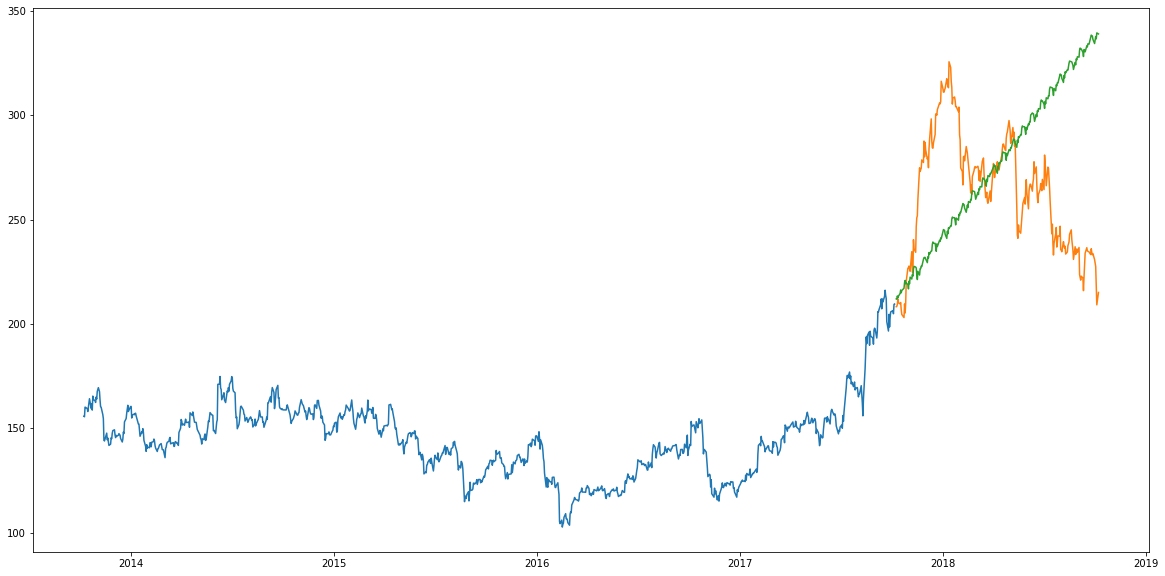

In [ ]:

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

## Prophet

Prophet, designed and pioneered by Facebook .The input for Prophet is a dataframe with two columns: date and target (ds and y). Prophet is univariante model. Prophet tries to capture the seasonality in the past data and works well when the dataset is large

In [ ]:
new_data_p = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [ ]:
for i in range(0,len(data)):
    new_data_p['Date'][i] = data['Date'][i]
    new_data_p['Close'][i] = data['Close'][i]

In [ ]:
new_data_p.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [ ]:
new_data_p['Date'] = pd.to_datetime(new_data_p.Date,format='%Y-%m-%d')
new_data_p.index = new_data_p['Date']

#preparing data
new_data_p.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [ ]:
new_data_p.tail()

,ds,y
Date,,
2018-10-01,2018-10-01,230.9
2018-10-03,2018-10-03,227.6
2018-10-04,2018-10-04,218.2
2018-10-05,2018-10-05,209.2
2018-10-08,2018-10-08,215.15


In [ ]:
train = new_data_p[:987]
valid = new_data_p[987:]

In [ ]:
print(train.shape)
print(valid.shape)

(987, 2)
(248, 2)


In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-10-08,149.659777,149.436999,167.242646,149.659777,149.659777,8.549685,8.549685,8.549685,-1.509905,-1.509905,-1.509905,10.059590,10.059590,10.059590,0.0,0.0,0.0,158.209462
1,2013-10-09,149.690765,148.876386,168.146385,149.690765,149.690765,8.933448,8.933448,8.933448,-1.374827,-1.374827,-1.374827,10.308275,10.308275,10.308275,0.0,0.0,0.0,158.624213
2,2013-10-10,149.721754,149.544954,168.806274,149.721754,149.721754,9.308080,9.308080,9.308080,-1.263374,-1.263374,-1.263374,10.571454,10.571454,10.571454,0.0,0.0,0.0,159.029834
3,2013-10-11,149.752742,149.705930,169.169827,149.752742,149.752742,9.699106,9.699106,9.699106,-1.142886,-1.142886,-1.142886,10.841992,10.841992,10.841992,0.0,0.0,0.0,159.451848
4,2013-10-14,149.845708,150.704683,169.500587,149.845708,149.845708,10.327693,10.327693,10.327693,-1.291541,-1.291541,-1.291541,11.619234,11.619234,11.619234,0.0,0.0,0.0,160.173401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2018-06-07,245.835087,224.571579,256.309034,232.610564,258.357492,-5.410135,-5.410135,-5.410135,-1.263374,-1.263374,-1.263374,-4.146761,-4.146761,-4.146761,0.0,0.0,0.0,240.424951
1231,2018-06-08,246.054972,223.816320,257.209663,232.752144,258.681625,-5.254143,-5.254143,-5.254143,-1.142886,-1.142886,-1.142886,-4.111257,-4.111257,-4.111257,0.0,0.0,0.0,240.800829
1232,2018-06-09,246.274858,225.813036,256.907833,232.897091,258.983163,-4.741622,-4.741622,-4.741622,-0.665314,-0.665314,-0.665314,-4.076308,-4.076308,-4.076308,0.0,0.0,0.0,241.533236
1233,2018-06-10,246.494743,233.268013,265.378123,233.044635,259.283677,3.209001,3.209001,3.209001,7.247847,7.247847,7.247847,-4.038846,-4.038846,-4.038846,0.0,0.0,0.0,249.703744


In [ ]:
forecast_valid = forecast['yhat'][987:]
rms_p=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms_p

57.31515213754124

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



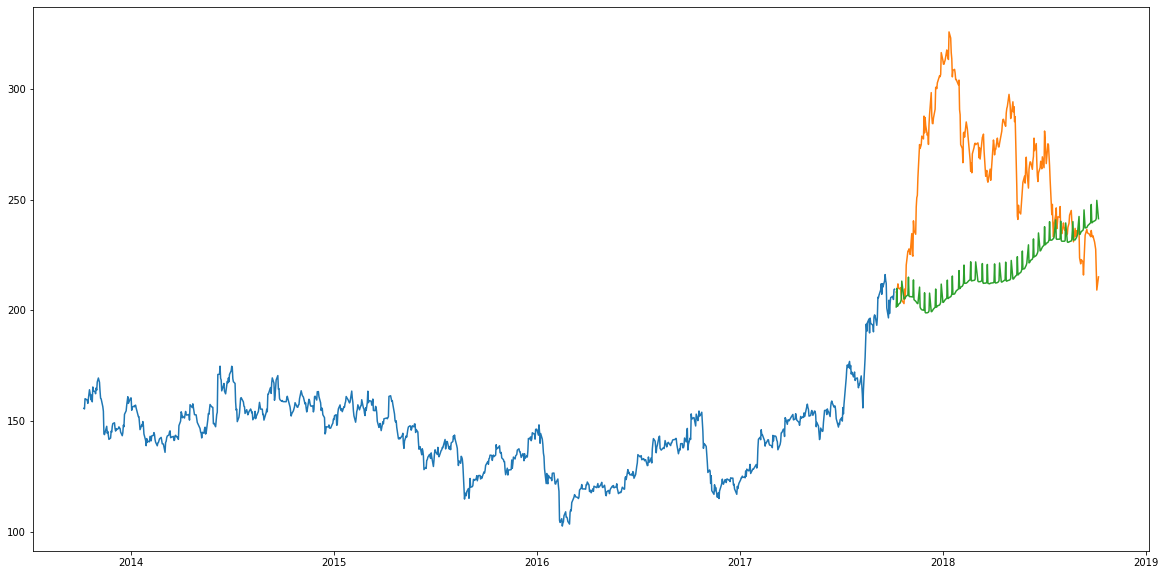

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

## LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
data = df.sort_index(ascending=True, axis=0)

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [ ]:
dataL = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    dataL['Date'][i] = data['Date'][i]
    dataL['Close'][i] = data['Close'][i]

In [ ]:
dataL.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [ ]:
dataL.index = dataL.Date
dataL.drop('Date', axis=1, inplace=True)
dataset = dataL.values

In [ ]:
dataL.head()

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


In [ ]:
dataset.shape

(1235, 1)

In [ ]:
train = dataset[0:987,:]
valid = dataset[987:,:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.238234],
       [0.237113],
       [0.257732],
       [0.257284],
       ...,
       [0.560063],
       [0.517929],
       [0.477589],
       [0.504258]])

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train.shape

(927, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(927, 60, 1)

In [ ]:
y_train.shape

(927,)

- ***LSTM network design***

Input layer 
(no.of lstm units - 50)

Hidden layer - 1
(no.of lstm units - 50)

Output layer

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1)

927/927 [==============================] - 24s 6ms/step - loss: 0.0023


In [ ]:
#predicting 246 values, using past 60 from the train data
inputs = dataL[len(new_data) - len(valid) - 60:].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

(308, 1)


In [ ]:
inputs.shape

(308, 1)

- stacking last 60 days data to predict current day values.

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
print(len(X_test))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
print(closing_price)

248
[[204.5073 ]
 [205.48215]
 [206.28159]
 [207.0076 ]
 ...
 [235.3695 ]
 [234.21414]
 [231.62471]
 [227.44998]]


In [ ]:
rms_lstm=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms_lstm

11.234172052961648

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



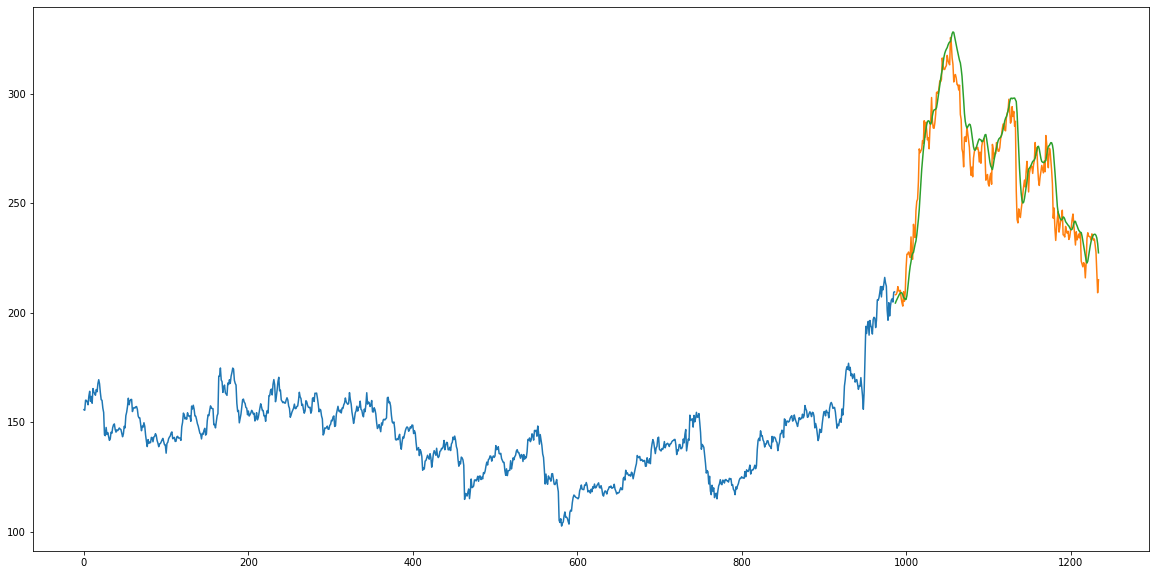

In [ ]:

train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

## so far analysis and future tasks

In [ ]:
print("Root Mean Square Error :")
print("Linear Regression : ", rms_lr)
print("Auto ARIMA : ", rms_aa)
print("Prophet : ", rms_p)
print("LSTM network : ", rms_lstm)

Root Mean Square Error :
Linear Regression :  121.16382449873667
Auto ARIMA :  54.54322744872866
Prophet :  57.31515213754124
LSTM network :  11.234172052961648


- auto arima and prophet are univariate models which means it accepts only one input 

- for lstm we can use multivariate inputs and also we can run pca dimensionality reduction methods 

- tasks to complete 

    - try out lstm with two more layers 
    - try out tuning hyperparameters
    - declare exact variables for model inputs(Incedent detection)